In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [6]:
pollen_d=pd.read_csv('count_pollen.csv')
polleni=pd.read_csv('pollen_imputed.csv',header=None)
pollen=pollen_d.values
pollenimp=polleni.values

In [7]:
pollen[0][80]

0.0

In [8]:
pollenimp[0][80]

6.863612478

In [9]:
import numpy as np
import pandas as pd
import scanpy as sc

In [10]:
adata=sc.read_csv('count_pollen.csv',delimiter=',', first_column_names=None, dtype='float32')

In [11]:
adata.X.shape

(299, 9665)

In [12]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

In [13]:
adata

AnnData object with n_obs × n_vars = 299 × 9665
    obs: 'n_genes'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

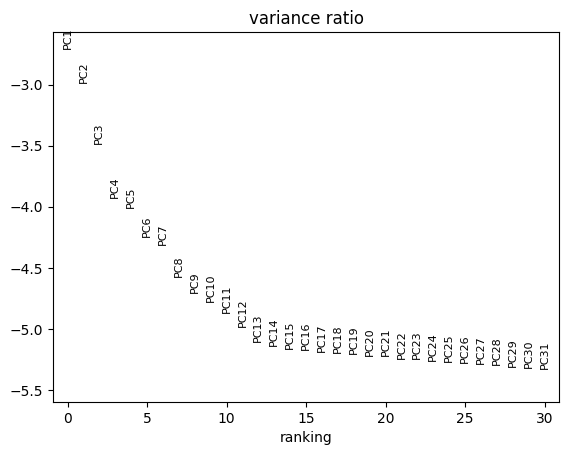

In [14]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [15]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata5)
##visualizing clusters
#sc.pl.umap(adata5, color=['leiden'])

/home/zaman/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


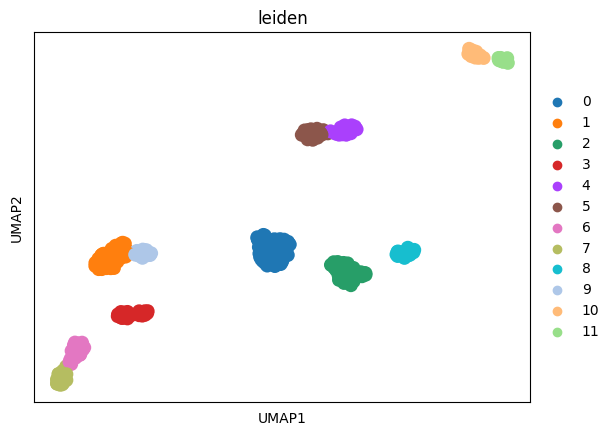

In [16]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [17]:
adata.obs['leiden']

0      4
1      5
2      2
3      1
4      1
      ..
294    0
295    4
296    3
297    0
298    5
Name: leiden, Length: 299, dtype: category
Categories (12, object): ['0', '1', '2', '3', ..., '8', '9', '10', '11']

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
silhouette_avg

-0.021684097

In [19]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('pollenc.txt',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_18628/1706489607.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('pollenc.txt',dtype=None, delimiter=",")


In [20]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

0.8032215558847724